In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Load the data

df = pd.read_csv("/home/inventor/Datasets/Advertising Sales/advertising/sales.csv")

In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unnamed: 0               200 non-null    int64  
 1   TV Ad Budget ($)         200 non-null    float64
 2   Radio Ad Budget ($)      200 non-null    float64
 3   Newspaper Ad Budget ($)  200 non-null    float64
 4   Sales ($)                200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV Ad Budget ($),Radio Ad Budget ($),Newspaper Ad Budget ($),Sales ($)
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
# Handle Missing Values

df.isnull().sum()

Unnamed: 0                 0
TV Ad Budget ($)           0
Radio Ad Budget ($)        0
Newspaper Ad Budget ($)    0
Sales ($)                  0
dtype: int64

In [9]:
# Duplicate in the DAta
df.duplicated().sum()

np.int64(0)

In [12]:
# Rename the Columns 

df.rename(columns={"TV Ad Budget ($)" : "Tv_Ad_Budget", 
           "Radio Ad Budget ($)" : "Radio_Ad_Budget",
           "Newspaper Ad Budget ($)" : "Newspaper_Budget",
           "Sales ($)" : "Sales"}, inplace=True)

In [13]:
df.head()

,Unnamed: 0,Tv_Ad_Budget,Radio_Ad_Budget,Newspaper_Budget,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


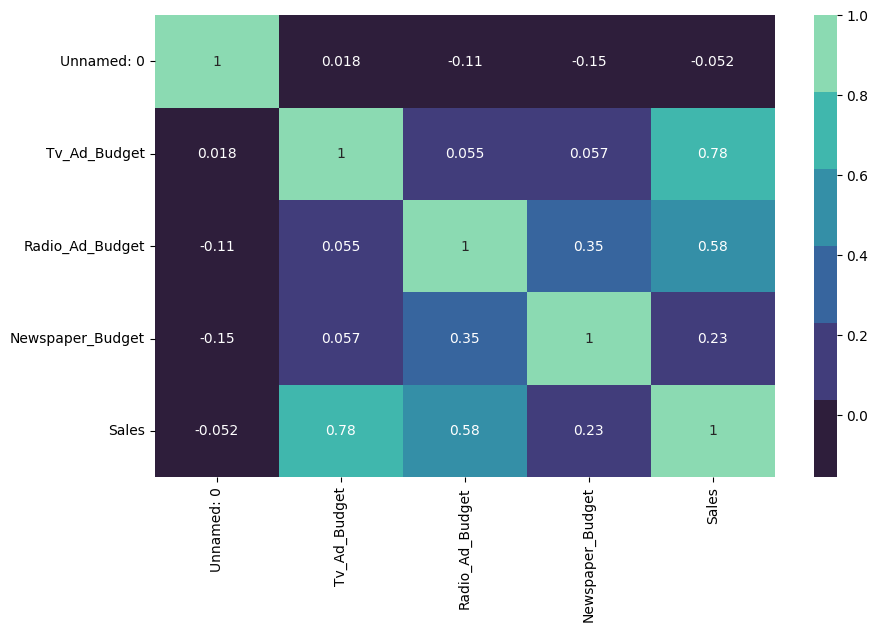

In [15]:
# Correlation Matrix

corr_matrix = df.corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap=sns.color_palette("mako"))
plt.show()

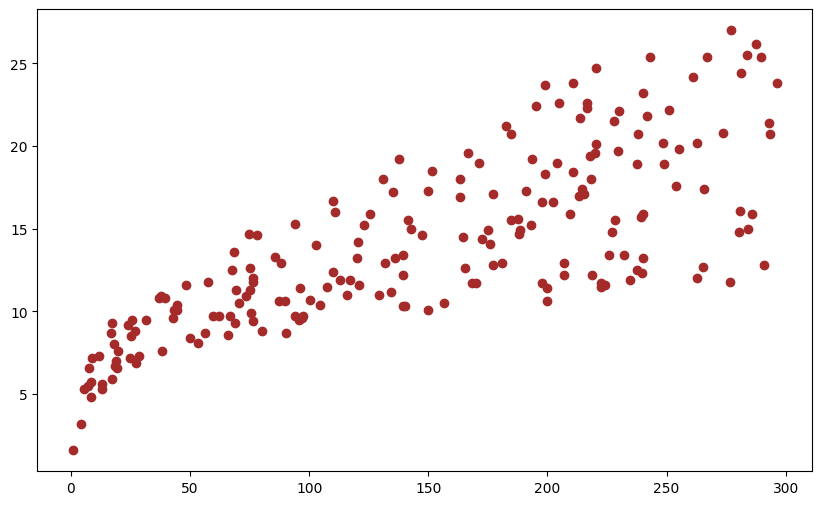

In [20]:
plt.figure(figsize=(10, 6))
plt.scatter(df["Tv_Ad_Budget"], df["Sales"], c="brown")

<Axes: >

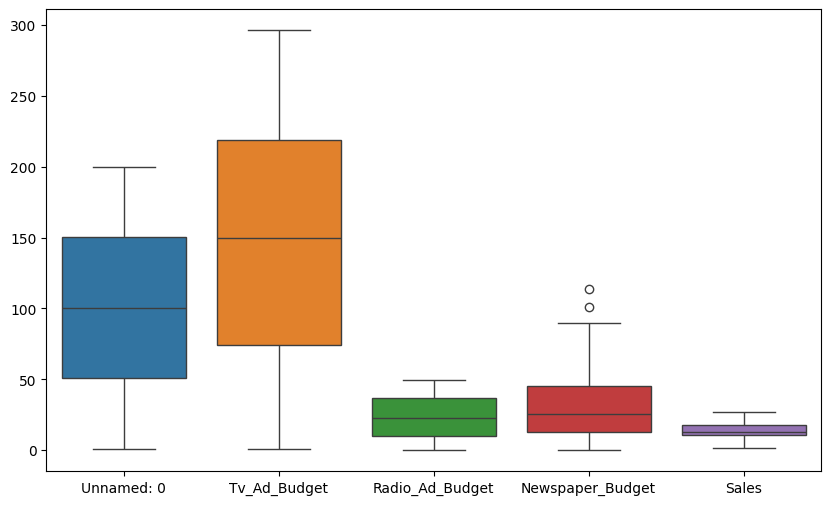

In [31]:
plt.figure(figsize=(10, 6))
sns.boxplot(df)

<Axes: ylabel='Newspaper_Budget'>

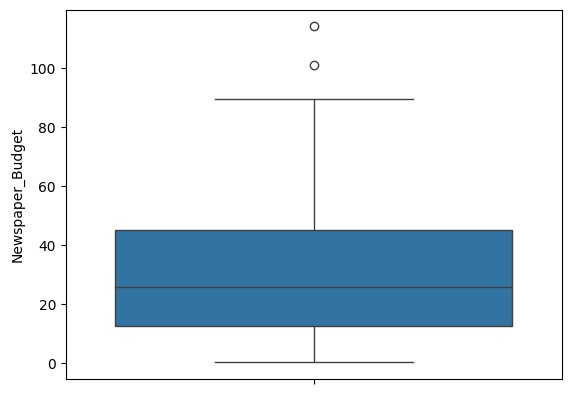

In [32]:
sns.boxplot(df["Newspaper_Budget"])

In [33]:
q1 = df["Newspaper_Budget"].quantile(0.25)
q3 = df["Newspaper_Budget"].quantile(0.75)
iqr = q3 - q1;
lower_bound = q1 - 1.5 * iqr
upper_bound = q3 + 1.5 * iqr

print(f"Lower bound {lower_bound}")
print(f"Upper Bound {upper_bound}")

Lower bound -35.775000000000006
Upper Bound 93.625


In [36]:
from feature_engine.outliers import ArbitraryOutlierCapper

arb = ArbitraryOutlierCapper(min_capping_dict={"Newspaper_Budget" : -35.77}, max_capping_dict={"Newspaper_Budget": 93.625})

df = arb.fit_transform(df)

<Axes: ylabel='Newspaper_Budget'>

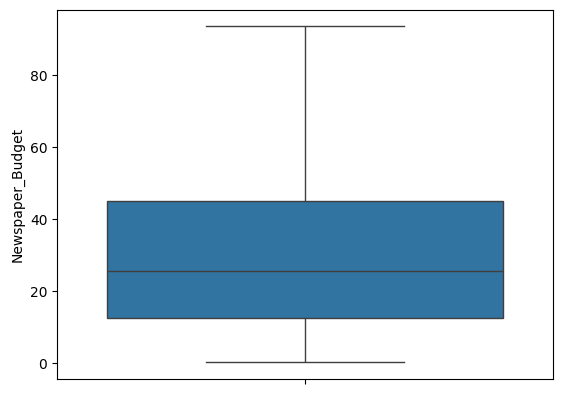

In [39]:
sns.boxplot(df["Newspaper_Budget"])

In [37]:
# Split the data into Train and Test 

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop("Sales", axis=1), df["Sales"], test_size=0.2, random_state=42)

In [38]:
class Multiple_LinearRegression():

    def __init__(self):

        self.coef_ = None
        self.intercept_ = None
    
    def fit(self, X_train, y_train):

        X_train = np.insert(X_train, 0, 1, axis=1)

        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)

        self.coef_ = betas[1:]

        self.intercept_ = betas[0]
    
    def predict(self, X_test):

        y_pred = np.dot(X_test, self.coef_) + self.intercept_

        return y_pred

In [22]:
mlr = Multiple_LinearRegression()

In [23]:
mlr.fit(X_train, y_train)

In [24]:
y_pred_mlr = mlr.predict(X_test)

In [ ]:
m = -(mlr.coef_)

In [25]:
from sklearn.metrics import r2_score
r2_score_mlr = r2_score(y_test, y_pred_mlr)

r2_score_mlr

0.8986489151417079